In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

In [9]:
# loading and inspecting the dataset
review = pd.read_excel("British Airways reviews from third party website.xlsx")
review

,CustomerName,ReviewdatePublished,CustomerCountry,TypeofTraveller,Aircraft,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,FoodBeverages,InflightEntertainment,GroundService,ValueForMoney,WifiConnectivity,Recommended
0,Michelle Morgan,26th April 2023,Sweden,Couple Leisure,NaN,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,1,NaN,no
1,Srinivasan Balaji,24th April 2023,United States,Couple Leisure,Boeing 777,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,2,1.0,no
2,P Patel,24th April 2023,Canada,Family Leisure,Boeing 777,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,1,NaN,no
3,C Mayre,23rd April 2023,Ireland,Family Leisure,Dreamliner,Economy Class,London to Denver,February 2023,2.0,1.0,1.0,3.0,1.0,2,1.0,no
4,Kai Kohlberger,22nd April 2023,United Kingdom,Solo Leisure,A350,Premium Economy,London to Hong Kong,April 2023,4.0,5.0,4.0,3.0,4.0,4,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,S Munro,20th May 2014,United Kingdom,NaN,NaN,Business Class,NaN,NaN,5.0,5.0,3.0,2.0,NaN,5,NaN,yes
3486,Connie Green,19th May 2014,United Kingdom,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,2.0,3.0,NaN,5,NaN,no
3487,R Richards,18th May 2014,United Kingdom,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,2.0,NaN,1,NaN,no
3488,D Ellis,18th May 2014,United Kingdom,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,1.0,NaN,4,NaN,yes


In [10]:
#printing concised summary of the report
review.describe()

,SeatComfort,CabinStaffService,FoodBeverages,InflightEntertainment,GroundService,ValueForMoney,WifiConnectivity
count,3389.000000,3379.000000,3145.000000,2427.000000,2697.000000,3490.000000,544.000000
mean,2.890823,3.270198,2.722734,2.657190,2.832036,2.725788,1.944853
std,1.359258,1.482911,1.435889,1.398501,1.447257,1.468166,1.365414
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
review.count()

CustomerName             3490
ReviewdatePublished      3490
CustomerCountry          3488
TypeofTraveller          2766
Aircraft                 1844
SeatType                 3489
Route                    2762
DateFlown                2758
SeatComfort              3389
CabinStaffService        3379
FoodBeverages            3145
InflightEntertainment    2427
GroundService            2697
ValueForMoney            3490
WifiConnectivity          544
Recommended              3490
dtype: int64

In [48]:
# the data types for all columns 
review.dtypes

CustomerName                     object
ReviewdatePublished      datetime64[ns]
CustomerCountry                  object
TypeofTraveller                  object
Aircraft                         object
SeatType                         object
Route                            object
DateFlown                        object
SeatComfort                     float64
CabinStaffService               float64
FoodBeverages                   float64
InflightEntertainment           float64
GroundService                   float64
ValueForMoney                     int64
WifiConnectivity                float64
Recommended                      object
dtype: object

In [46]:
# change year column to datatime format 
review['ReviewdatePublished'] = pd.to_datetime(review['ReviewdatePublished'])

In [50]:
#Checking for null values
review.isna().any()

CustomerName             False
ReviewdatePublished      False
CustomerCountry           True
TypeofTraveller           True
Aircraft                  True
SeatType                  True
Route                     True
DateFlown                 True
SeatComfort               True
CabinStaffService         True
FoodBeverages             True
InflightEntertainment     True
GroundService             True
ValueForMoney            False
WifiConnectivity          True
Recommended              False
dtype: bool

In [37]:
# Count total NaN at each column in a DataFrame
calc = (review.isnull().sum()/len(review)*100).round(2).astype(str).add(' %')
print(" \n Total % NaN at each column in a DataFrame : \n\n",
      f'{calc}')

 
 Total % NaN at each column in a DataFrame : 

 CustomerName               0.0 %
ReviewdatePublished        0.0 %
CustomerCountry           0.06 %
TypeofTraveller          20.74 %
Aircraft                 47.16 %
SeatType                  0.03 %
Route                    20.86 %
DateFlown                20.97 %
SeatComfort               2.89 %
CabinStaffService         3.18 %
FoodBeverages             9.89 %
InflightEntertainment    30.46 %
GroundService            22.72 %
ValueForMoney              0.0 %
WifiConnectivity         84.41 %
Recommended                0.0 %
dtype: object


In [62]:

table = review[['SeatComfort','CabinStaffService','FoodBeverages','InflightEntertainment', 'GroundService', 'ValueForMoney','WifiConnectivity']].copy()
table

,SeatComfort,CabinStaffService,FoodBeverages,InflightEntertainment,GroundService,ValueForMoney,WifiConnectivity
0,3.0,3.0,3.0,2.0,3.0,1,NaN
1,3.0,2.0,1.0,1.0,3.0,2,1.0
2,2.0,1.0,2.0,3.0,1.0,1,NaN
3,2.0,1.0,1.0,3.0,1.0,2,1.0
4,4.0,5.0,4.0,3.0,4.0,4,NaN
...,...,...,...,...,...,...,...
3485,5.0,5.0,3.0,2.0,NaN,5,NaN
3486,1.0,1.0,2.0,3.0,NaN,5,NaN
3487,1.0,1.0,1.0,2.0,NaN,1,NaN
3488,4.0,4.0,4.0,1.0,NaN,4,NaN


<AxesSubplot:title={'center':'Popular review ratings'}>

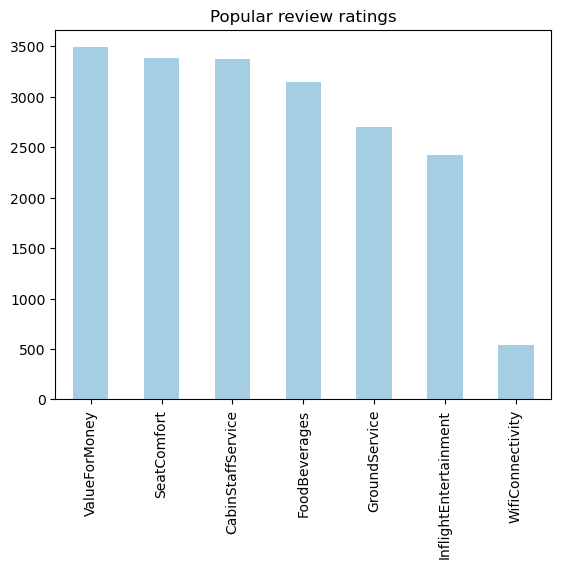

In [78]:
table.count().sort_values(ascending=False).plot(kind='bar', label='index', colormap='Paired', title='Popular review ratings')

In [85]:
review['Recommended'].value_counts()

no     2046
yes    1444
Name: Recommended, dtype: int64

<AxesSubplot:ylabel='Recommended'>

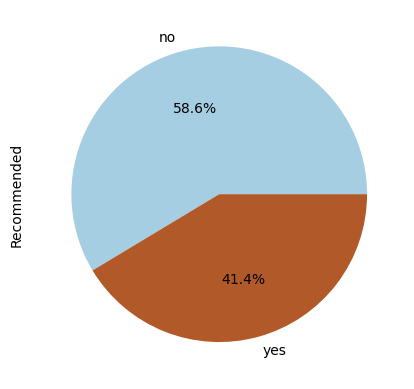

In [84]:
review['Recommended'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Paired')

Sentiment analysis based on the Recommended colmn value 